In [372]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from __future__ import division
from itertools import count
import matplotlib.pyplot as plt
from numpy import linspace, loadtxt, ones, convolve
import numpy as np
import pandas as pd
import collections
from random import randint
from matplotlib import style
style.use('fivethirtyeight')
%matplotlib inline
from sklearn.cluster import KMeans
import seaborn as sns
sns.set(rc={'figure.figsize':(16.7,8.27)})

In [373]:
df = pd.read_csv("7hnz0037D3.csv")
df = df[['loc. (actual) [km]', 'voltage [V]']]

df.sort_index(inplace=True)

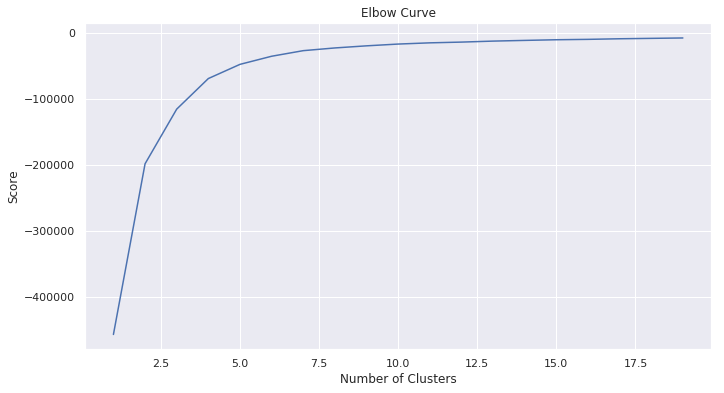

In [374]:
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(df) for i in n_cluster]
scores = [kmeans[i].score(df) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

We see that the graph levels of after 12.5 clusters. So we set our clusters at 12 and use this data to plot 3D clusters

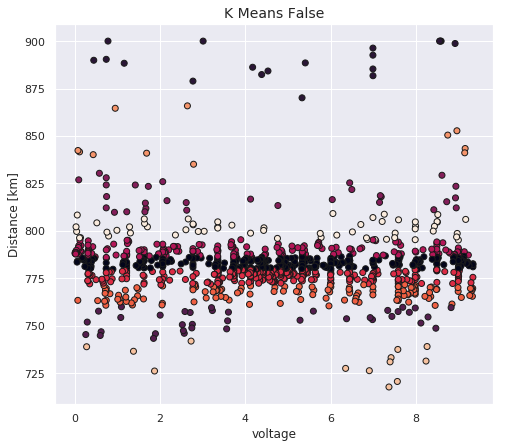

In [375]:
X = df
km1 = KMeans(n_clusters=10)
km1.fit(X)
km1.predict(X)
labels = km1.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
plt.scatter(X.iloc[:,0], X.iloc[:,1],
          c=labels.astype(np.float), edgecolor="k")
plt.xlabel("voltage")
plt.ylabel("Distance [km]")
plt.title("K Means False", fontsize=14);



In [376]:
df_0 = pd.read_csv("7hnz0037.csv")
df_0 = df_0[['loc. (actual) [km]', 'voltage [V]']]
df_0.sort_index(inplace=True)

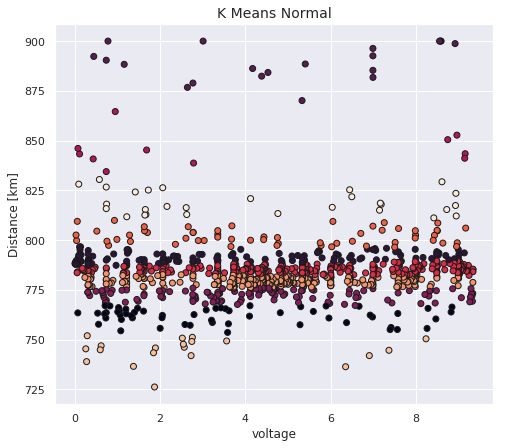

In [377]:
X = df_0
km0 = KMeans(n_clusters=10)
km0.fit(X)
km0.predict(X)
labels = km0.labels_
#Plotting
fig = plt.figure(1, figsize=(7,7))
fig = plt.figure(1, figsize=(7,7))
plt.scatter(X.iloc[:,0], X.iloc[:,1],
          c=labels.astype(np.float), edgecolor="k")
plt.xlabel("voltage")
plt.ylabel("Distance [km]")
plt.title("K Means Normal", fontsize=14);

In [378]:
def getDistanceByPoint(data, model):
    distance = pd.Series()
    for i in range(0,len(data)):
        Xa = np.array(data['voltage [V]'].values[i])
        Xb = model.cluster_centers_[model.labels_[i]-1]
        distance.set_value(i, np.linalg.norm(Xa-Xb))
    return distance

In [380]:
outliers_fraction = 0.01
# get the distance between each point and its nearest centroid. The biggest distances are considered as anomaly
distance_normal = getDistanceByPoint(df_0, km0)
number_of_outliers = int(outliers_fraction*len(distance))
distance_faulty = getDistanceByPoint(df, km1) 
distance_faulty -= distance_faulty.mean() - distance_normal.mean()
threshold = distance_normal.nsmallest(number_of_outliers).max()
# anomaly1 contain the anomaly result of the above method Cluster (0:normal, 1:anomaly) 
df['anomaly1'] = (distance_faulty <= threshold).astype(int)

/home/aggelos/anaconda3/envs/tf-cpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


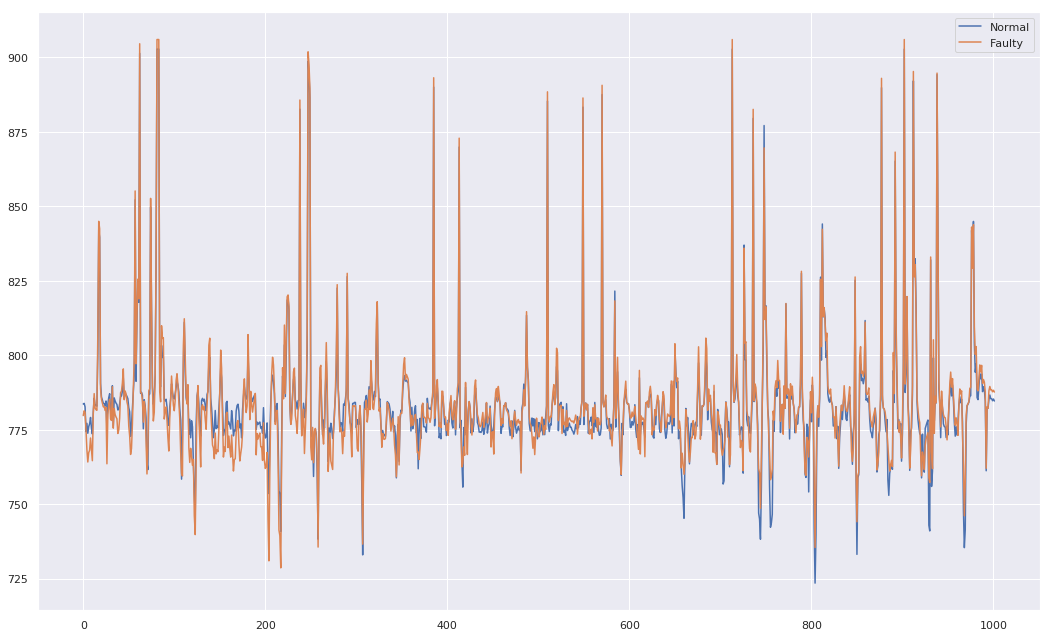

In [382]:
plt.figure(figsize=(16,11))
plt.plot(distance_normal, label='Normal')
plt.plot(distance_faulty, label='Faulty')
plt.legend(loc='best')


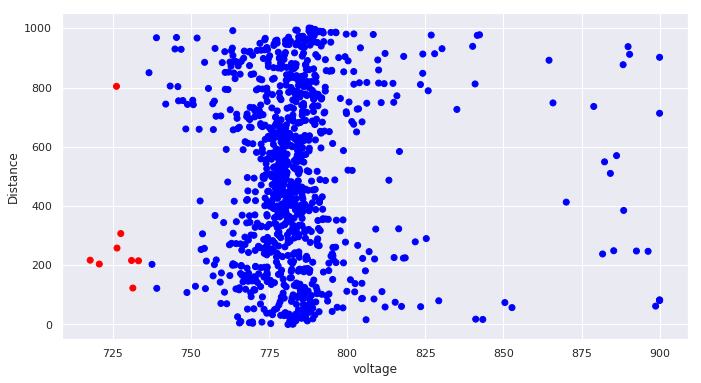

In [383]:
# visualisation of anomaly with cluster view
fig, ax = plt.subplots(figsize=(10,6))
colors = {0:'blue', 1:'red'}
ax.scatter(df['voltage [V]'],df.index, c=df["anomaly1"].apply(lambda x: colors[x]))
plt.xlabel('voltage')
plt.ylabel('Distance')
plt.show();

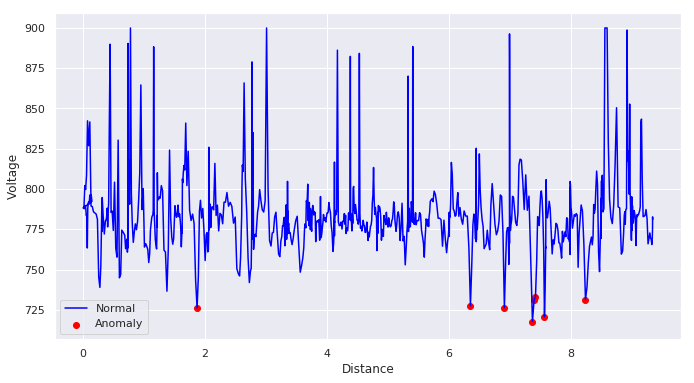

In [384]:
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly1'] == 1, ['loc. (actual) [km]', 'voltage [V]']] #anomaly

ax.plot(df['loc. (actual) [km]'], df['voltage [V]'], color='blue', label='Normal')
ax.scatter(a['loc. (actual) [km]'],a['voltage [V]'], color='red', label='Anomaly')
plt.xlabel('Distance')
plt.ylabel('Voltage')
plt.legend()
plt.show();

In [370]:
df_0.head()

,loc. (actual) [km],voltage [V]
0,9.340000,785.202087
1,9.339889,785.416748
2,9.339778,784.113892
3,9.338555,778.748291
4,9.334444,773.262268
